In [ ]:
import sys 
input = sys.stdin.readline
INF = int(1e9) #무한을 의미하는 값으로 10억을 설정

#노드의 개수, 간선의 개수를 입력받기
n,m = map(int,input().split())
#시작 노드 번호를 입력받기
start = int(input())
#각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n+1)]
#방문한 적이 있는지 체크하는 목적의 리스트를 만들기
visited = [False] * (n+1)
#최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n+1)

#모든 간선 정보를 입력받기
for _ in range(m):
    a,b,c = map(int,input().split())
    #a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append((b,c))

#방문하지 않은 노드 중에서, 가장 최단 거리가 짧은 노드의 번호를 반환
def get_smallest_node():
    min_value = INF
    index = 0 #가장 최단 거리가 짧은 노드(인덱스)
    for i in range(1,n+1):
        if(distance[i] < min_value and not visited[i]):
            min_value = distance[i]
            index = i
    return index

def dijkstra(start):
    #시작 노드에 대해서 초기화
    distance[start] = 0
    visited[start] = True
    for j in graph[start]:
        distance[j[0]] = j[1]
    #시작 노드를 제외한 전체 n-1개의 노드에 대해 반복
    for i in range(n-1):
        #현재 최단 거리가 가장 짧은 노드를 꺼내서, 방문 처리
        now = get_smallest_node()
        visited[now] = True
        #현재 노드와 연결된 다른 노드를 확인
        for j in graph[now]:
            cost = distance[now] + j[1]
            #현재 노드를 거쳐서 다른 노드로 이동하는 거리가 더 짧은 경우
            if(cost < distance[j[0]]):
                distance[j[0]] = cost

#다익스트라 알고리즘 수행
dijkstra(start)

#모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n+1):
    #도달할 수 없는 경우, 무한(INFINITY)이라고 출력
    if(distance[i] == INF):
        print("INFINITY")
    #도달할 수 있는 경우 거리를 출력
    else:
        print(distance[i])


## Simple Dijkstra
## jupyter에서는 실행되지 않는 코드(sys문제)
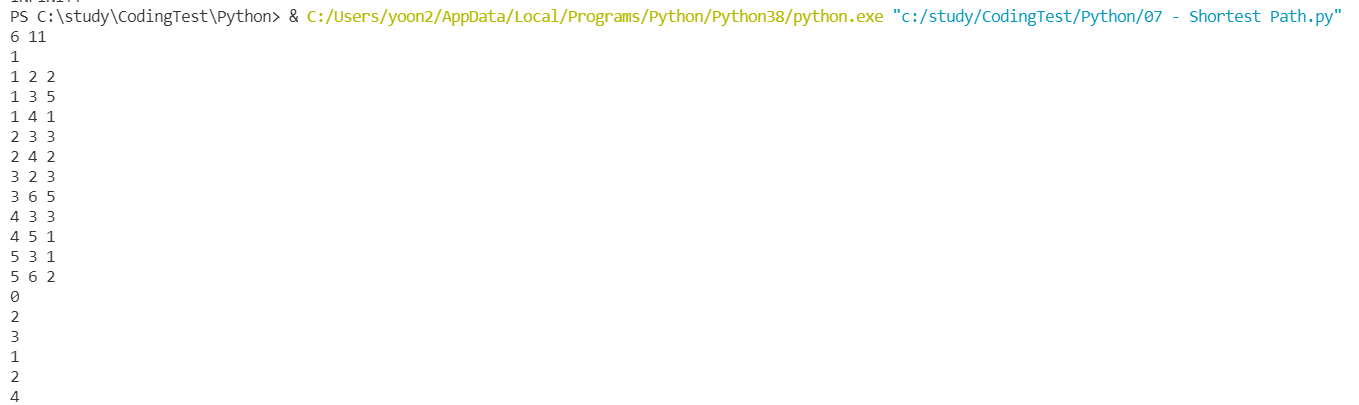

In [ ]:
import heapq
import sys 
input = sys.stdin.readline
INF = int(1e9) #무한을 의미하는 값으로 10억을 설정

#노드의 개수, 간선의 개수를 입력받기
n,m = map(int,input().split())
#시작 노드 번호를 입력받기
start = int(input())
#각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n+1)]
#최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n+1)

#모든 간선 정보를 입력받기
for _ in range(m):
    a,b,c = map(int,input().split())
    #a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append((b,c))

def dijkstra(start):
    q = []
    #시작 노드로 가기 위한 최단 경로는 0으로 설정하여, 큐에 삽입
    heapq.heappush(q, (0, start))
    distance[start] = 0
    while q: #큐가 비어있지 않다면
        #가장 최단 거리가 짧은 노드에 대한 정보 꺼내기
        dist, now = heapq.heappop(q)
        #현재 노드가 이미 처리된 적이 있는 노드라면 무시
        if(distance[now] < dist):
            continue
        #현재 노드가 연결된 다른 인접한 노드들을 확인
        for i in graph[now]:
            cost = dist + i[1]
            #현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
            if(cost < distance[i[0]]):
                distance[i[0]] = cost
                heapq.heappush(q, (cost,i[0]))

#다익스트라 알고리즘 수행
dijkstra(start)

#모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n+1):
    #도달할 수 없는 경우, 무한(INFINITY)이라고 출력
    if(distance[i] == INF):
        print("INFINITY")
    #도달할 수 있는 경우 거리를 출력
    else:
        print(distance[i])

## Advanced Dijkstra
### jupyter에서는 실행되지 않는 코드(sys문제)
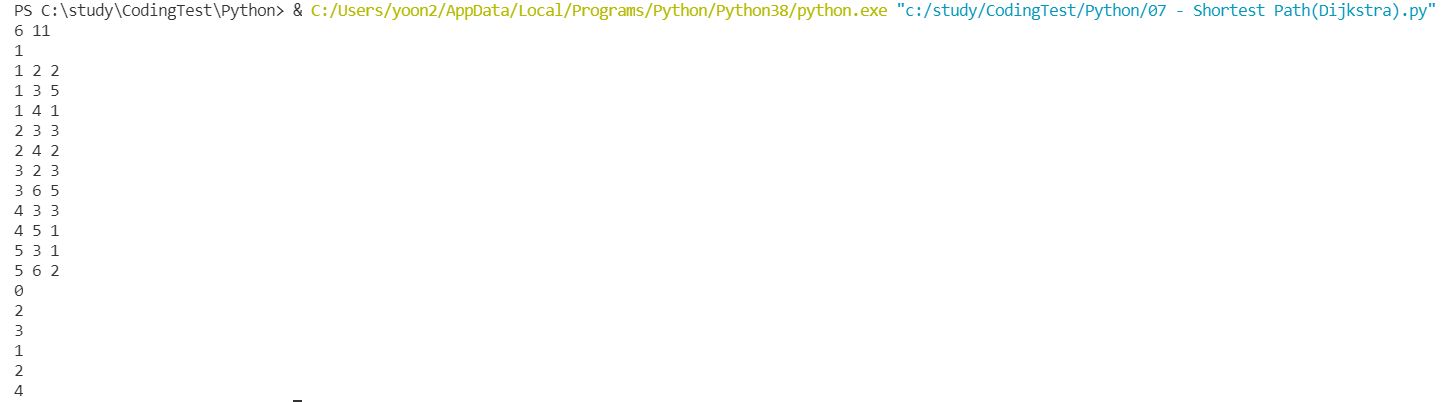

In [3]:
#플로이도 워셜 알고리즘
INF = int(1e9)

#노드의 개수 및 간선의 개수를 입력받기
n = int(input())
m = int(input())
#2차원 리스트(그래프 표현)를 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n+1) for _ in range(n+1)]

#자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1,n+1):
    for b in range(1, n+1):
        if(a==b):
            graph[a][b] = 0
            
#각 간선에 대한 정보를 입력받아, 그 값으로 초기화
for _ in range(m):
    #A에서 B로 가는 비용은 C라고 설정
    a,b,c = map(int,input().split())
    graph[a][b] = c
    
#점화식에 따라 플로이드 워셜 알고리즘 수행
for k in range(1, n+1):
    for a in range(1, n+1):
        for b in range(1,n+1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])
            
#수정된 결과를 출력
for a in range(1, n+1):
    for b in range(1, n+1):
        #도달할 수 없는 경우, 무한(INFINITY)이라고 출력
        if(graph[a][b] == INF):
            print("INFINITY", end = " ")
        #도달할 수 있는 경우 거리를 출력
        else:    
            print(graph[a][b], end=" ")
    print()

4
7
1 2 4
1 4 6
2 1 3
2 3 7
3 1 5
3 4 4
4 3 2
0 4 8 6 
3 0 7 9 
5 9 0 4 
7 11 2 0 
